<a href="https://colab.research.google.com/github/tripti-agarwal/Formal-Method-verification/blob/main/Copy_of_BDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

sys.path[0:0] = ['./Jove/pbl/python',
                   './Jove/pbl/python/BDD_V2',
                   './Jove/pbl/python/BDD_V2/BDD_V2',
                   './Jove/pbl/python/BDD_V2/BDD_V2/include',
                   './Jove/pbl/python/PyBool',
                   './Jove/pbl/python/PyBool/include',
                   './Jove/pbl/python/PyBool/include/ply'
                ]
! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi

In [ ]:
from BDD import *
from BDD_ite import *
from BDD_ite1 import *
from dot_bdd import *

from PBL_CNF import *
from PBL_NNE import *

from PyBool_algorithms import *
from PyBool_builder import *
from PyBool_dimacs_parse import *
from PyBool_public_interface import *
from PyBool_std_parse import *

from ply import *
from cpp import *
from ctokens import *
from lex import *
from yacc import *
from buildBDD import *
from buildBDDMin import *
from common import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Here is the language specification for using BDDs


Tyler Sorensen
February 18, 2012
University of Utah

This file contains the Specs for the standard input language of PyBool
It was implemented using the ply python package and all code can
be found in the file PyBool_std_parse.py.


-------------------------------------------------------------
---Legal Operators-------------------------------------------
-------------------------------------------------------------

The legal operators are:

And -            noted: &
Or -             noted: |
logically equal- noted: <=>
implies -	 noted: =>
not -		 noted: ~
Exclusive or -	 noted: XOR
Parenthesis  -   noted: ( )

They corespond to their usual meaning in Boolean Algebra

-------------------------------------------------------------
---Key Words-------------------------------------------------
-------------------------------------------------------------

The following are keywords that cannot be used as variable
names along with a brief description

Var_Order
Used in declaring the variable ordering

Main_Exp
Used in identifying the expression to consider

XOR
the exclusive or operator

-------------------------------------------------------------
---Key Words and Variables-----------------------------------
-------------------------------------------------------------

Variables, much like any other language are a string of characters.

The restrictions on variable names are the following:

-Cannot start with a symbol or a 0 or 1 (must start with a letter)

-Cannot be a keyword

There are two types of variables, literal variables and formula 
variables. 

Literal variables hold a 0 or a 1

Formula variables hold an expression and are declared simply by assigning
them.

-------------------------------------------------------------
--Variable Declaration---------------------------------------
-------------------------------------------------------------

-Literal Variables and Var_Order

Some applications of Boolean formula require an explicit variable
ordering to be declared. This is what the Var_Order keyword is for.
To explicity declare a variable order, simply write
Var_Order : List_of_Variables

example:
Var_Order : x1 x2 x3

You are not limited to one Var_Order statement, as you might want
to add variables later on, just don't repeat variable declarations.

-Formula Variables

To declare a formula variable, simply use the assignment operator '='
For example, if you wanted the variable X to hold the following formula:
x1 & x2 & ~x3 you would simply write the line:

X = x1 & x2 & ~x3

Now X can be used in other formulas in place of x1 & x2 & ~x3

-------------------------------------------------------------
--Main_Exp---------------------------------------------------
-------------------------------------------------------------

Once you have all your expression written, you need to tell the
BDD which expression you actually want solved. It can be useful
to have many "sub" expression but only solve certain combinations
of them at a time. This is done with the Main_Exp keyword. 

Say you have two formulas stored in X1 and X2 and you want to 
solve the conjunction of the formulas, you would write:

Main_Exp : X1 & X2

Notice how Main_Exp is followed by a ':'

In general Main_Exp is

Main_Exp : expression

where expression is any valid expression consisting of literals,
literal variables or formula variables.

-------------------------------------------------------------
--Msc--------------------------------------------------------
-------------------------------------------------------------

A few final points:

Comments are started with a # symbol will render the rest
of the line as a comment. 

Semi Colons are ignored, so if it is your style to end lines with
a semi colon, please do so.

-------------------------------------------------------------
--Putting it all together - an Example-----------------------
-------------------------------------------------------------

#=== ANY TIME YOU CAN CHANGE width = ... TO OBTAIN A DECENTLY SIZED BDD ===
## You may then right-click on the BDD and download the PNG file

# A practice example

In [ ]:
EquiSat = '''
Var_Order : a,b,c,p,z
fGiven = (c|(a&b))
fTseitin = z &(~p|a) & (~p|b) & (~a|~b|p) &(~z|p|c) & (~p|z) & (~c|z)
Main_Exp : fTseitin -> fGiven # OP is -> and <- in turn
'''

bdd in dot file {'u': 1, 'n': 5, 'h_table': {}, 't_table': {0: (6, None, None), 1: (6, None, None)}, 'var_order': ['a', 'b', 'c', 'p', 'z'], 'expr': {'type': 'impl', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'and', 'expr1': {'type': 'var', 'name': ('z', 0)}, 'expr2': {'type': 'or', 'expr1': {'type': 'neg', 'expr': {'type': 'var', 'name': ('p', 0)}}, 'expr2': {'type': 'var', 'name': ('a', 0)}}}, 'expr2': {'type': 'or', 'expr1': {'type': 'neg', 'expr': {'type': 'var', 'name': ('p', 0)}}, 'expr2': {'type': 'var', 'name': ('b', 0)}}}, 'expr2': {'type': 'or', 'expr1': {'type': 'or', 'expr1': {'type': 'neg', 'expr': {'type': 'var', 'name': ('a', 0)}}, 'expr2': {'type': 'neg', 'expr': {'type': 'var', 'name': ('b', 0)}}}, 'expr2': {'type': 'var', 'name': ('p', 0)}}}, 'expr2': {'type': 'or', 'expr1': {'type': 'or', 'expr1': {'type': 'neg', 'expr': {'type': 'var', 'name': ('z', 0)}}, 'expr2': {'t

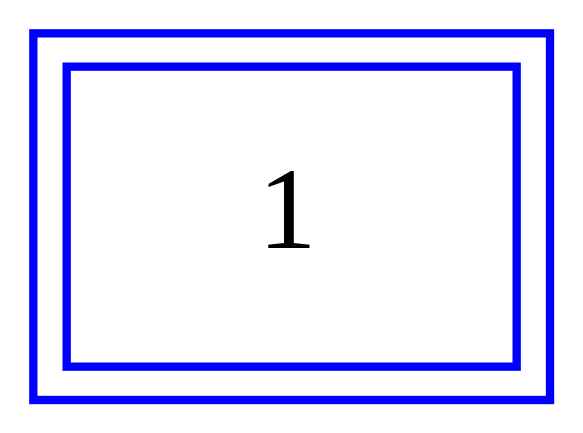

In [ ]:
buildBDDmain(EquiSat.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=300)

# This is the Babies and Crocodiles example mentioned in Quiz-11
## The proof by contradiction is obtained with ~C added to Main_Exp
## Try also w/o that to see the full BDD (for your practice)

In [ ]:
# Babies and crocodiles

BabCroc = '''
#Formula for a simple Lewis Carroll logic puzzle.
#
#The Puzzle is stated as follows:
#Assume that:
#
#All babies are illogical.
#Nobody is despised who can manage a crocodile.
#Illogical persons are despised.
#
#Show that:
#Babies cannot manage crocodiles.

#Declare variables and order
Var_Order : babies illogical despised manageCrocs

#Babies are illogical
P1 = babies => illogical

#illogical people are despised
P2 = illogical => despised

#People who manage crocs are not despised   
P3 = manageCrocs => ~despised	

#Conclusion: babies cannot manage crocs
C  = babies => ~manageCrocs

#Main expression is all premises with the negation
#of what we're trying to prove. Should have 0 satisfying
#assignments if true.
Main_Exp : P1 & P2 & P3 & ~C
'''

In [ ]:
buildBDDmain(BabCroc.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=600)

# Lewis Carroll's Example of "Wise Young Pigs"
# Also called "Wise Balloonist" in Quiz-11

  First try by setting Extra to 1 (i.e. Extra = 1) and run
  This is a "Forgotten English Fact" that will almost give you
  a 0 node (counterexample) ... but if you read the path, you will
  see that we must have this Extra condition that old <-> ~young.
  Once that is added, we get a full counterexample. This is a neat
  way to teach proofs in a fun way!

In [ ]:
# Also called Wise Balloonist

Carroll='''
#Input for a Lewis Carroll problem
#Written in the mark up language for the python BDD manager

#Declare all the variables. Notice how you can use
#more than one line.
Var_Order : eatPennyBuns old young danceTightRopes
Var_Order : pigs respect giddy publicLunch ridiculous
Var_Order : umbrella fat wise balloon 

#These are the Premises
P1 = (~danceTightRopes & ~eatPennyBuns) => old 
P2 = (pigs & giddy) => respect
P3 = (ridiculous & eatPennyBuns) => ~publicLunch
P4 = (young & balloon) => giddy
P5 = (wise & balloon) => umbrella
P6 = (fat & ridiculous & ~danceTightRopes) => publicLunch
P7 = (wise & giddy) => ~danceTightRopes
P8 = (pigs & umbrella) => ridiculous
P9 = (~danceTightRopes & respect) => fat  

# Extra Frame Axiom needed (try with Extra = 1 for some fun, as we had forgotten this initially !!) 
Extra = old <=> ~young 

#This is the conclusion
C = (wise & young & pigs) => ~balloon

#This is all the premises conjoined
P_All = P1 & P2 & P3 & P4 & P5 & P6 & P7 & P8 & P9

#The main expression to be considered.
Main_Exp : P_All & Extra & ~C
'''

In [ ]:
buildBDDmain(Carroll.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=600)

# This is the "Four Coloring" test where some adjacent states in the USA are listed
# Also consider this as part of Quiz-11
## Specifically, Utah, Nevada, Arizona, and Colorado have 2 bits each
## BDDs compute the coloring by avoiding coloring neighboring states the same
## Read the "0/1" codes for the states as a "color"
## the "aUT" and "bUT" bit bits tell you the "a/b" bits assigned for Utah
## So on for others

In [ ]:
FourColoringStates = '''

Var_Order : aUT, bUT, aNV, bNV, aAZ, bAZ, aCO, bCO

Nv_not_Ut = ~((aNV <=> aUT) & (bNV <=> bUT))
Nv_not_Az = ~((aNV <=> aAZ) & (bNV <=> bAZ))
Az_not_Ut = ~((aUT <=> aAZ) & (bUT <=> bAZ))

Co_not_Az = ~((aCO <=> aAZ) & (bCO <=> bAZ))
Co_not_Ut = ~((aCO <=> aUT) & (bCO <=> bUT))


#Nv_Ut = ((aNV <=> aAZ) & (bNV <=> bAZ))
#NvRed = (aNV & bNV)
#AzRed = (aAZ & bAZ)

Main_Exp : Nv_not_Ut & Nv_not_Az & Az_not_Ut & Co_not_Az & Co_not_Ut
'''

In [ ]:
buildBDDmain(FourColoringStates.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=800)

# Teaching CNF and DNF

BDDs are a lovely way to teach about Conjunctive Normal Forms (CNF) and Disjunctive Normal Forms (DNF). We illustrate this by building the BDD for a 2-input XOR function. 

Then we show how you can "read out" XOR's DNF from the BDD by following the paths leading to "1". Read the conjunction of the literals along these paths and "OR" (+) them, or disjunct them.

Finally we show how to "read out" XOR's CNF by following paths leading to 0. We now read the disjunction of the complement of the literals along the paths leading to a 0, and "AND" (&) them, or conjoin them.

Last but not least we prove that these are all equivalent as the Main_Exp

In [ ]:
CnfDnf = '''
# Teaching CNF and DNF 

# Inputs to the XOR
Var_Order : x, y

# DNF read-out by following paths leading to "1" as described above
xor_dnf = x & ~y | ~x & y

# CNF read-out by following paths leading to "0" as described above
xor_cnf = (~x | ~y) & (x | y)

# To check the identity, uncomment the following as the only Main_Exp
 Main_Exp : xor_dnf <-> xor_cnf

# To paint the XOR BDD via DNF, uncomment the following as the only Main_Exp
# Main_Exp : xor_dnf

# To paint the XOR BDD via CNF, uncomment the following as the only Main_Exp
 Main_Exp : xor_cnf
'''

In [ ]:
buildBDDmain(CnfDnf.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=600)

# Question 1 : uncomment and rerun as needed

## Uncomment enough Var_Order declarations to provide the required variable definitions

## Leave one Main_Exp for final use; its BDD will be built

## Make sure Main_Exp has all the defined Var_Order variables + all supporting defns

## Increase width=300 to something higher (e.g. 600) if the BDD is small

## Follow the remaining instructions



In [ ]:
# Q1 as given to you is below. Again, follow the instructions as above

Q1 = '''
#
# Var_Order : a3, a2, a1, a0, b3, b2, b1, b0    
#
# Var_Order : something else -- DISCOVER THAT BETTER Var_Order and write here, removing the above!!
#
lt1 = (~a3 & b3) | (~a2 & b2) | (~a1 & b1) | (~a0 & b0)
gt1 = (a3 & ~b3) | (a2 & ~b2) | (a1 & ~b1) | (a0 & ~b0)
lt2 = ~a3 & b3 | (a3<=>b3) & (~a2 & b2 | ((a2<=>b2) & (~a1 & b1 | (a1<=>b1) & ~a0 & b0)))
gt2 = a3 & ~b3 | (a3<=>b3) & (a2 & ~b2 | ((a2<=>b2) & (a1 & ~b1 | (a1<=>b1) & a0 & ~b0)))
eq = (a3 <=> b3) & (a2 <=> b2) & (a1 <=> b1) & (a0 <=> b0)
# 
# Enable one of the Main_Exp below
#
Main_Exp  : lt1 & gt1
#3 Main_Exp  : lt1 & gt1
#4 Main_Exp  : lt2 & gt2
#5 Main_Exp  : (lt1 & ~gt1) <=> lt1
#6 Main_Exp  : (lt2 & ~gt2) <=> lt2
'''

In [ ]:
buildBDDmain(Q1.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=600)

# Space to enter Q2 is below

In [ ]:
Q2 = '''
# Enter your BDD code below
#...
'''

In [ ]:
buildBDDmain(Q2.splitlines())

import graphviz
from IPython.display import Image
import pydot

graphs = pydot.graph_from_dot_file(final_dot_file+".dot")
graph = graphs[0]
graph.write_png(final_dot_file+'.png')
from IPython.display import Image
Image(final_dot_file+'.png', width=300)

# End